In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e268cd7344d59357413ea2c5e527d25


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          ""})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gonaives
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | olafsvik
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | chervone
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | rio claro
Processing Record 13 of Set 1 | kangaba
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | catamarca
Processing Record 16 of Set 1 | digoin
Processing Record 17 of Set 1 | arlit
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | norheimsund
Processing Record 22 of Set 1 | araguacu
Processing Record 23 of Set 1 | klaksvik
Proce

Processing Record 38 of Set 4 | guerrero negro
Processing Record 39 of Set 4 | alyangula
Processing Record 40 of Set 4 | ovalle
Processing Record 41 of Set 4 | svetlogorsk
Processing Record 42 of Set 4 | kabinda
Processing Record 43 of Set 4 | itarema
Processing Record 44 of Set 4 | atuona
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | bud
Processing Record 47 of Set 4 | kamaishi
Processing Record 48 of Set 4 | sao miguel do araguaia
Processing Record 49 of Set 4 | kedgwick
Processing Record 50 of Set 4 | orange
Processing Record 1 of Set 5 | gamba
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | umarizal
Processing Record 4 of Set 5 | lagoa
Processing Record 5 of Set 5 | qasigiannguit
Processing Record 6 of Set 5 | faro
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of Set 5 | maragogi
Processing Record 9 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 5 | mehamn
Processing Record 11 of Set 5 | bou

Processing Record 26 of Set 8 | touros
Processing Record 27 of Set 8 | atar
Processing Record 28 of Set 8 | avera
Processing Record 29 of Set 8 | okrika
Processing Record 30 of Set 8 | ambanja
Processing Record 31 of Set 8 | maiduguri
Processing Record 32 of Set 8 | talnakh
Processing Record 33 of Set 8 | burns lake
Processing Record 34 of Set 8 | surt
Processing Record 35 of Set 8 | christchurch
Processing Record 36 of Set 8 | sivaki
Processing Record 37 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 38 of Set 8 | gat
Processing Record 39 of Set 8 | suraabad
Processing Record 40 of Set 8 | shar
Processing Record 41 of Set 8 | coahuayana
Processing Record 42 of Set 8 | batemans bay
Processing Record 43 of Set 8 | wilmington island
Processing Record 44 of Set 8 | ust-ilimsk
Processing Record 45 of Set 8 | camacupa
Processing Record 46 of Set 8 | aguimes
Processing Record 47 of Set 8 | charleston
Processing Record 48 of Set 8 | gizo
Processing Record 49 of Set 8 | o

Processing Record 14 of Set 12 | kirakira
Processing Record 15 of Set 12 | sioux lookout
Processing Record 16 of Set 12 | bella vista
Processing Record 17 of Set 12 | ramshir
Processing Record 18 of Set 12 | vallenar
Processing Record 19 of Set 12 | aurdal
Processing Record 20 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set 12 | nuh
Processing Record 22 of Set 12 | roma
Processing Record 23 of Set 12 | mujiayingzi
Processing Record 24 of Set 12 | aykhal
Processing Record 25 of Set 12 | qazanbulaq
Processing Record 26 of Set 12 | dunedin
Processing Record 27 of Set 12 | genhe
Processing Record 28 of Set 12 | necochea
Processing Record 29 of Set 12 | utiroa
City not found. Skipping...
Processing Record 30 of Set 12 | nguiu
City not found. Skipping...
Processing Record 31 of Set 12 | namatanai
Processing Record 32 of Set 12 | mopipi
Processing Record 33 of Set 12 | muisne
Processing Record 34 of Set 12 | stonewall
Processing Record 35 of Set 12 | kazalins

In [11]:
len(city_data)

583

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gonaives,19.4500,-72.6833,80.49,75,30,6.76,HT,2021-05-25 00:25:57
1,Mahebourg,-20.4081,57.7000,71.89,83,40,3.44,MU,2021-05-25 00:25:58
2,Longyearbyen,78.2186,15.6401,26.44,74,75,10.36,SJ,2021-05-25 00:24:00
3,Tuktoyaktuk,69.4541,-133.0374,32.00,93,90,9.22,CA,2021-05-25 00:25:58
4,Yellowknife,62.4560,-114.3525,42.57,42,20,4.00,CA,2021-05-25 00:25:05
5,Tiksi,71.6872,128.8694,37.06,81,72,6.44,RU,2021-05-25 00:25:58
6,Olafsvik,64.8945,-23.7142,43.92,80,90,11.90,IS,2021-05-25 00:25:59
7,Bluff,-46.6000,168.3333,42.21,70,4,4.32,NZ,2021-05-25 00:25:59
8,Vaini,-21.2000,-175.2000,78.96,69,75,9.22,TO,2021-05-25 00:25:59
9,Chervone,49.9564,28.8645,51.42,85,58,5.03,UA,2021-05-25 00:25:59


In [13]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]


In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today


'05/24/21'

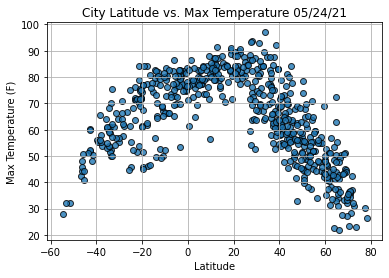

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

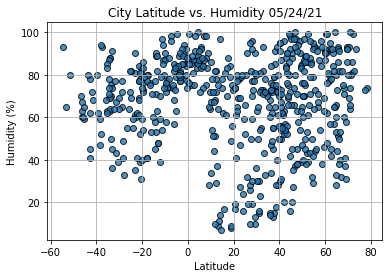

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

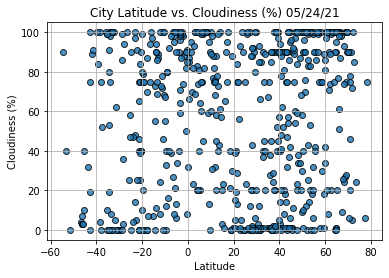

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

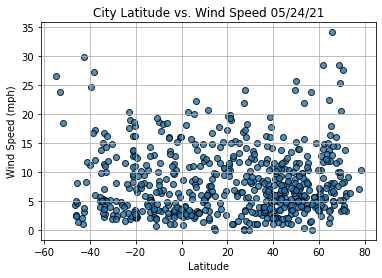

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


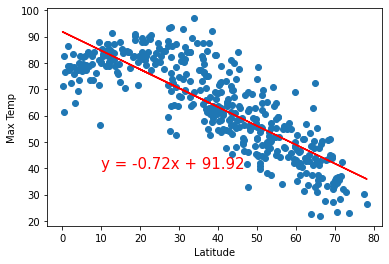

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
plt.show()

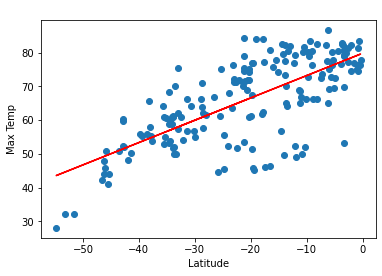

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

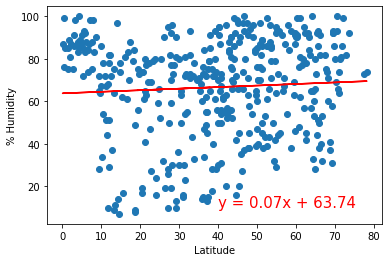

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

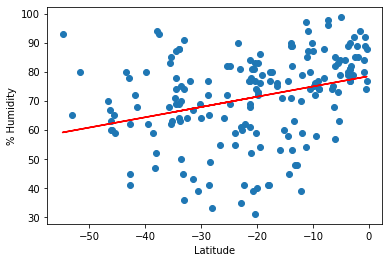

In [45]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

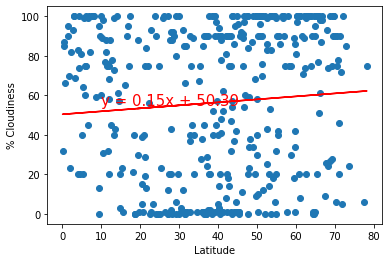

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness', (10,55))

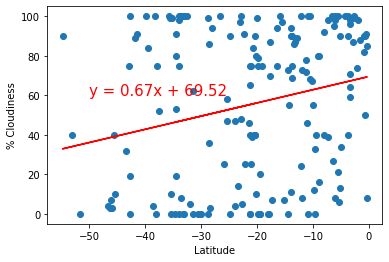

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere /n for % Cloudiness', '% Cloudiness',(-50,60))

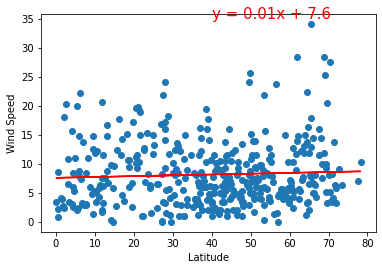

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

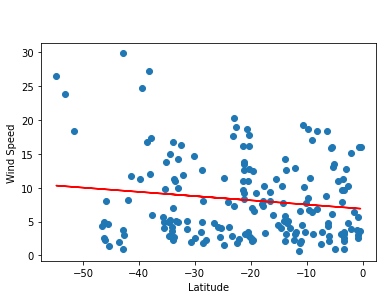

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
